In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
brfss = pd.read_hdf("brfss.hdf5","brfss")

In [102]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [103]:
brfss.columns

Index(['SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT', '_AGEG5YR', '_VEGESU1',
       '_HTMG10', 'AGE'],
      dtype='object')

In [104]:
height = brfss["HTM4"]
weight = brfss["WTKG3"]

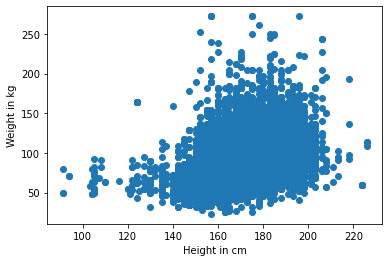

In [6]:
plt.plot(height, weight, "o")
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.show()

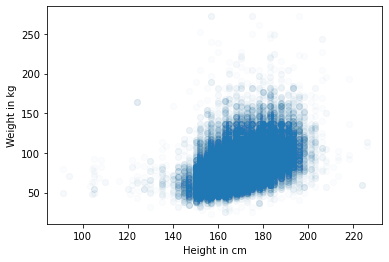

In [7]:
plt.plot(height, weight, "o", alpha = 0.02)
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.show()

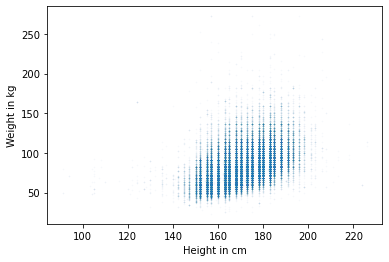

In [8]:
plt.plot(height, weight, "o", alpha = 0.02, markersize = 1)
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
plt.show()

In [9]:
len(brfss)

100000

In [10]:
brfss.shape

(100000, 9)

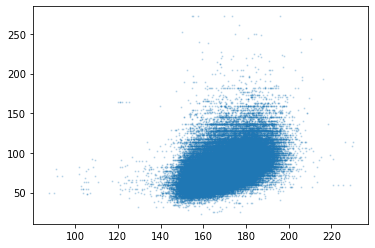

In [11]:
height_jitter = height + np.random.normal(0, 2, size = len(brfss))
plt.plot(height_jitter, weight, "o", markersize=1, alpha = 0.2)
plt.show()

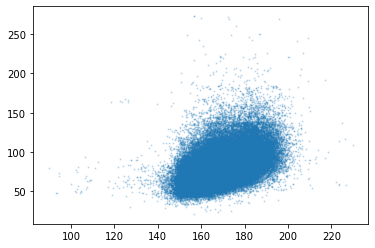

In [14]:
height_jitter = height + np.random.normal(0, 2, size = len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size = len(brfss))
plt.plot(height_jitter, weight_jitter, "o", markersize=1, alpha = 0.2)
plt.show()

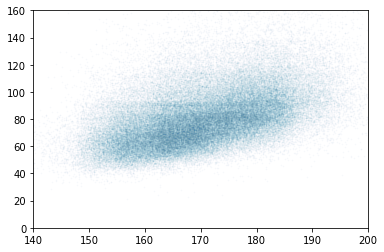

In [15]:
plt.plot(height_jitter, weight_jitter, "o", markersize=1, alpha = 0.02)
plt.axis([140,200,0,160])
plt.show()

# PMF of age

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. 

In [62]:
# Extract age
age = brfss["AGE"]
age

96230     47.0
244920    89.5
57312     42.0
32573     32.0
355929    32.0
          ... 
35187     57.0
73031     57.0
47807     37.0
57272     32.0
111756    52.0
Name: AGE, Length: 1000, dtype: float64

In [17]:
from empiricaldist import Pmf

In [18]:
# Plot the PMF
pmf_age = Pmf.from_seq(age, normalize = "False")

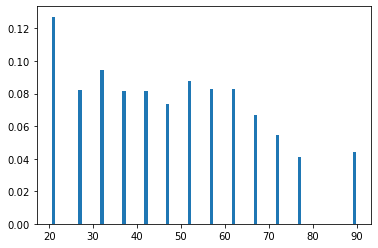

In [21]:
pmf_age.bar(label = "age")

# Scatter plot

Now let's make a scatterplot of weight versus age. To make the code run faster, select only the first 1000 rows from the brfss DataFrame.

In [24]:
# Select the first 1000 respondents
brfss = brfss[:1000]
brfss.shape

(1000, 9)

In [105]:
# Extract age and weight
age = brfss["AGE"]
weight = brfss["WTKG3"]

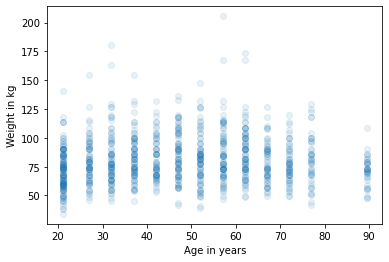

In [32]:
# Make a scatter plot
plt.scatter( age, weight, marker = "o", alpha = 0.1)
plt.xlabel("Age in years")
plt.ylabel("Weight in kg")
plt.show()

### Jittering

In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly.

In [33]:
# Select the first 1000 respondents
brfss.shape

(1000, 9)

In [47]:
age = brfss['AGE']
age.shape

(1000,)

In [50]:
age.head(20)

96230     47.0
244920    89.5
57312     42.0
32573     32.0
355929    32.0
305424    89.5
302232    57.0
283720    27.0
26440     47.0
125041    52.0
418672    32.0
31904     67.0
385508    47.0
386383    72.0
31129     67.0
304602    52.0
273000    27.0
294535    47.0
212163    21.0
94541     72.0
Name: AGE, dtype: float64

In [51]:
# Add jittering to age
age = brfss['AGE'] + np.random.normal(0,2, size=len(brfss))
age.shape

(1000,)

In [52]:
age.head(20)

96230     49.164204
244920    89.055888
57312     43.480983
32573     30.447056
355929    32.777905
305424    89.145841
302232    59.086045
283720    23.338990
26440     49.653468
125041    52.422785
418672    31.483964
31904     65.879830
385508    47.530073
386383    71.501348
31129     66.756995
304602    52.230483
273000    27.547325
294535    45.397278
212163    15.557444
94541     72.267964
Name: AGE, dtype: float64

In [36]:
# Extract weight
weight = brfss['WTKG3']
weight.shape

(1000,)

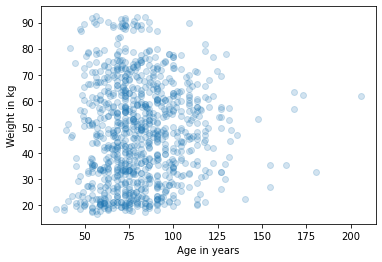

In [38]:
# Make a scatter plot
plt.scatter(weight, age, alpha = 0.2, marker = "o")
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Visualizing relationships

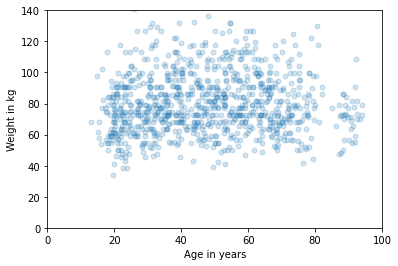

In [60]:
age = brfss["AGE"] + np.random.normal(0,2.5, size=len(brfss))
weight = brfss["WTKG3"]
plt.plot(age, weight, "o", markersize=5, alpha=0.2)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.axis([0,100,0,140])
plt.show()

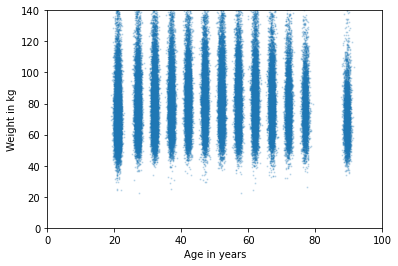

In [74]:
age = brfss["AGE"] + np.random.normal(0,0.5, size=len(brfss))
weight = brfss["WTKG3"] + np.random.normal(0,2, size=len(brfss))
plt.plot(age, weight, "o", markersize = 1, alpha = 0.2)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.axis([0,100,0,140])
plt.show()

# Violin Plot

In [76]:
data = brfss.dropna(subset=["AGE","WTKG3"])

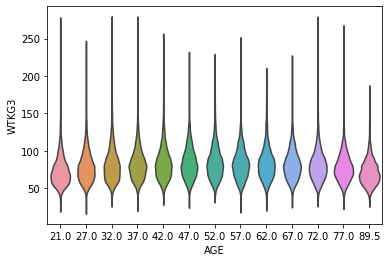

In [78]:
sns.violinplot(x = "AGE", y = "WTKG3", data = data, inner = None)
plt.show()

# Box Plot

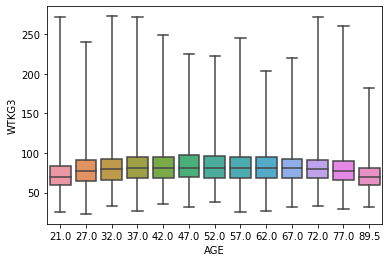

In [79]:
sns.boxplot(x = "AGE", y = "WTKG3", data = data, whis = 10)
plt.show()

# Log Scale

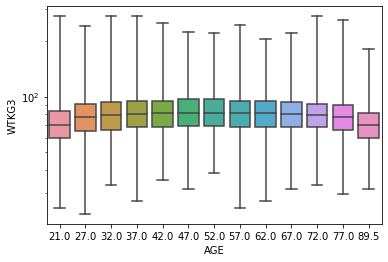

In [80]:
sns.boxplot(x = "AGE", y = "WTKG3", data=data, whis=10)
plt.yscale("log")
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Height and weight
Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.

In [106]:
# Drop rows with missing data
data = brfss.dropna(subset=["_HTMG10","WTKG3"])
data.isna().sum()

SEX            37
HTM4            0
WTKG3           0
INCOME2     12552
_LLCPWT         0
_AGEG5YR      644
_VEGESU1     8852
_HTMG10         0
AGE           644
dtype: int64

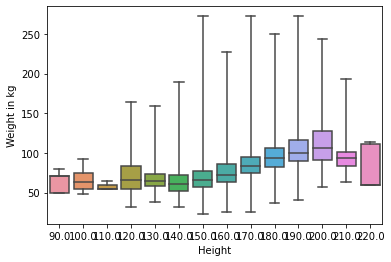

In [107]:
# Make a box plot
sns.boxplot(x="_HTMG10", y="WTKG3", data=data, whis=10)
plt.xlabel('Height')
plt.ylabel('Weight in kg')
plt.show()

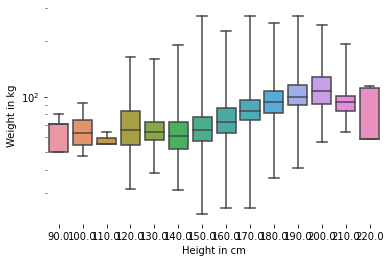

In [110]:
# Plot the y-axis on a log scale
plt.yscale("log")

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)

sns.boxplot(x="_HTMG10", y="WTKG3", data=data, whis=10)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

# Distribution of income

In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is 'INCOME2'. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all Pmf objects have a .bar() method.

In [111]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [112]:
income = brfss["INCOME2"]

In [113]:
pmf_income = Pmf.from_seq(income)

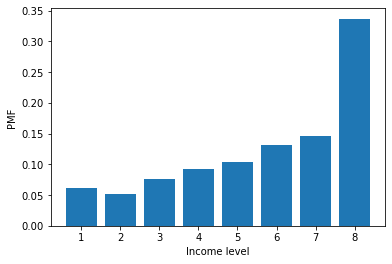

In [115]:
pmf_income.bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

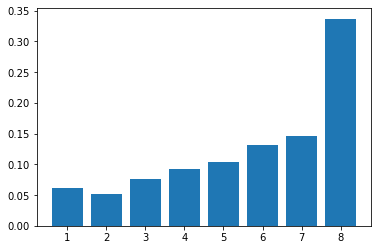

In [117]:
## kısayol
Pmf.from_seq(income).bar()

## Income and height
Let's now use a violin plot to visualize the relationship between income and height.

In [118]:
# Drop rows with missing data
data2 = brfss.dropna(subset=["INCOME2","HTM4"])

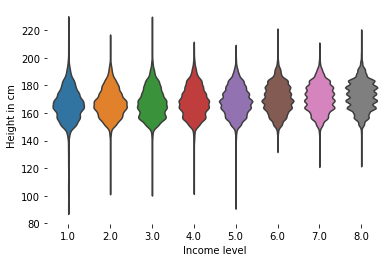

In [120]:
sns.violinplot(x = "INCOME2", y = "HTM4", data = data2, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Correlation

In [121]:
columns = ["HTM4","WTKG3","AGE"]

In [122]:
subset = brfss[columns]

In [123]:
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


1 - Correlation of anything with itself is 1.

2 - Height and weight is 0.47.

3 - Height and age -0.09, weak correlation.

## Correlation only works with Linear relationship!

In [124]:
xs = np.linspace(-1,1)

In [125]:
ys = xs**2

In [128]:
ys += np.random.normal(0, 0.05, len(xs))

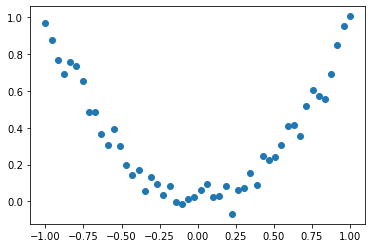

In [131]:
plt.scatter(xs,ys)

In [132]:
np.corrcoef(xs,ys)

array([[ 1.        , -0.01983892],
       [-0.01983892,  1.        ]])

# Computing correlations
The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '_VEGESU1' represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

In [134]:
# Select columns
columns = ["AGE","INCOME2","_VEGESU1"]
subset = brfss[columns]

In [135]:
subset.corr()

,AGE,INCOME2,_VEGESU1
AGE,1.000000,-0.015158,-0.009834
INCOME2,-0.015158,1.000000,0.119670
_VEGESU1,-0.009834,0.119670,1.000000


In [136]:
from scipy.stats import linregress

In [138]:
res = linregress(xs,ys)
res

LinregressResult(slope=-0.01022215501384773, intercept=0.34545075015684207, rvalue=-0.01983892148681137, pvalue=0.8912303054892045, stderr=0.0743563910739534)

### Regression Lines

In [153]:
subset = brfss.dropna(subset=["WTKG3","HTM4"])

In [155]:
xs = subset["HTM4"]
ys = subset["WTKG3"]
res = linregress(xs,ys)
res

LinregressResult(slope=0.9192115381848297, intercept=-75.12704250330233, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802998)

In [156]:
res.slope

0.9192115381848297

In [157]:
res.intercept

-75.12704250330233

In [158]:
res.rvalue

0.47420308979024584

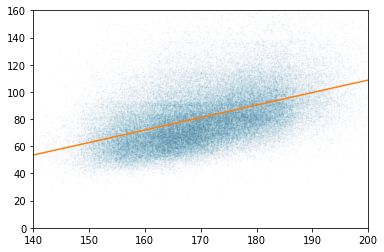

In [162]:
plt.plot(height_jitter, weight_jitter, "o", markersize=1, alpha = 0.02)
plt.axis([140,200,0,160])

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx,fy,"-")

plt.show()

# Linear regression has the same problem with corr(), it only measures linear relationships.

There is non-linear relationship below.

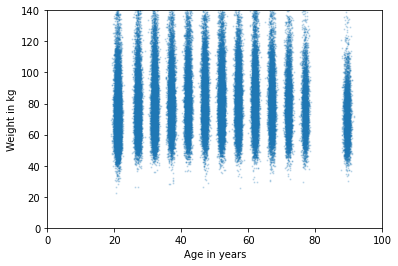

In [163]:
age = brfss["AGE"] + np.random.normal(0,0.5, size=len(brfss))
weight = brfss["WTKG3"] + np.random.normal(0,2, size=len(brfss))
plt.plot(age, weight, "o", markersize = 1, alpha = 0.2)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.axis([0,100,0,140])
plt.show()

In [165]:
subset = brfss.dropna(subset=["WTKG3","AGE"])
xs = subset["AGE"]
ys = subset["WTKG3"]

res = linregress(xs,ys)
res

LinregressResult(slope=0.023981159566968724, intercept=80.07977583683224, rvalue=0.021641432889064068, pvalue=4.374327493007566e-11, stderr=0.003638139410742186)

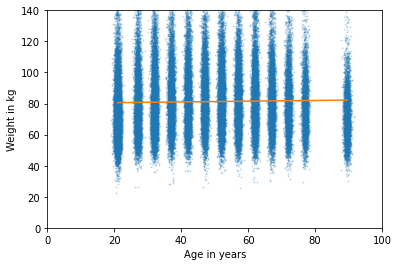

In [166]:
plt.plot(age, weight, "o", markersize = 1, alpha = 0.2)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.axis([0,100,0,140])

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx,fy,"-")

plt.show()

### Straight line does not capture the relationship between varables.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Income and vegetables

As we saw in a previous exercise, the variable '_VEGESU1' represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

In [186]:
from scipy.stats import linregress

In [187]:
# Extract the variables
subset = brfss.dropna(subset = ["INCOME2","_VEGESU1"])
xs = subset["INCOME2"]
ys = subset["_VEGESU1"]

In [188]:
res = linregress(xs, ys)
res

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305)

### Fit a line

Continuing from the previous exercise:

Assume that xs and ys contain income codes and daily vegetable consumption, respectively, and

res contains the results of a simple linear regression of ys onto xs.

Now, you're going to compute the line of best fit.

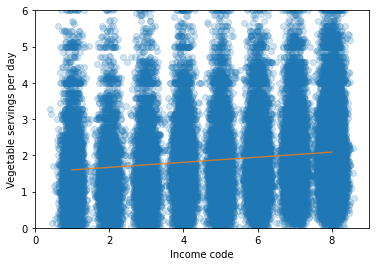

In [189]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15 ,len(xs))
plt.plot(x_jitter, ys, "o", alpha = 0.2)
#plt.show()

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

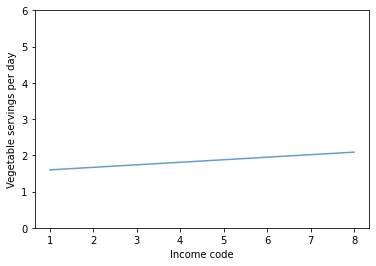

In [184]:
# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()